In [ ]:
import pandas as pd

# Load the dataset (Replace with your actual file path)
df = pd.read_csv("/path/to/your/wisconsin_breast_cancer_data.csv")

# Display the first 5 rows
df.head()


In [2]:
# Read the .names file (if it's a text file with column descriptions)
with open("wdbc.names", "r") as f:
    for line in f:
        print(line.strip())  # Print each line to inspect the feature names


1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators:

Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

W.N. Street, W.H. Wolberg and O.L. Mangasarian
Nuclear feature extraction for breast tumor diagnosis.
IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

O.L. Mangasarian, W.N. Street and W.H. Wolberg.
Breast cancer diagnosis and prognosis via linear programming.
Operations Research, 43(4), pages 570-577, July-Augu

In [5]:
import pandas as pd

# Load dataset
col_names = [
    "ID", "Diagnosis",
    "Mean_Radius", "Mean_Texture", "Mean_Perimeter", "Mean_Area", "Mean_Smoothness",
    "Mean_Compactness", "Mean_Concavity", "Mean_Concave_Points", "Mean_Symmetry", "Mean_Fractal_Dimension",
    "SE_Radius", "SE_Texture", "SE_Perimeter", "SE_Area", "SE_Smoothness",
    "SE_Compactness", "SE_Concavity", "SE_Concave_Points", "SE_Symmetry", "SE_Fractal_Dimension",
    "Worst_Radius", "Worst_Texture", "Worst_Perimeter", "Worst_Area", "Worst_Smoothness",
    "Worst_Compactness", "Worst_Concavity", "Worst_Concave_Points", "Worst_Symmetry", "Worst_Fractal_Dimension"
]

# Load data
df = pd.read_csv("wdbc.data", names=col_names, header=None)

# Display first few rows
df.head()


,ID,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load WDBC dataset (Assuming it's stored as 'wdbc.data')
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df = pd.read_csv("wdbc.data", header=None, names=column_names)

# Drop non-numeric columns (ID and Diagnosis)
X = df.iloc[:, 2:].values  # Only use feature columns

# Preprocessing methods
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
pca = PCA(n_components=2)

# Different preprocessing approaches
datasets = {
    "No Data Processing": X,
    "Using Normalization": scaler_minmax.fit_transform(X),
    "Using PCA": pca.fit_transform(X),
    "Using Normalization + PCA": pca.fit_transform(scaler_minmax.fit_transform(X))
}

# Cluster configurations
clusters = [3, 4, 5]

# Store results
results = []

# Apply different clustering techniques
for method, X_transformed in datasets.items():
    for c in clusters:
        # K-Means Clustering
        kmeans = KMeans(n_clusters=c, random_state=42, n_init=10)
        labels_kmeans = kmeans.fit_predict(X_transformed)

        # Hierarchical Clustering
        hierarchical = AgglomerativeClustering(n_clusters=c)
        labels_hierarchical = hierarchical.fit_predict(X_transformed)

        # Mean Shift Clustering
        meanshift = MeanShift()
        labels_meanshift = meanshift.fit_predict(X_transformed)

        # Store evaluation metrics
        for algo_name, labels in zip(
            ["K-Means", "Hierarchical", "Mean Shift"],
            [labels_kmeans, labels_hierarchical, labels_meanshift],
        ):
            silhouette = silhouette_score(X_transformed, labels)
            ch_score = calinski_harabasz_score(X_transformed, labels)
            db_score = davies_bouldin_score(X_transformed, labels)

            results.append([algo_name, method, c, silhouette, ch_score, db_score])

# Convert results to DataFrame
df_results = pd.DataFrame(
    results, columns=["Algorithm", "Preprocessing", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
)

# Save results for tabulation
df_results.to_csv("clustering_results.csv", index=False)

# Display the results
print(df_results)


       Algorithm              Preprocessing  Clusters  Silhouette  \
0        K-Means         No Data Processing         3    0.669594   
1   Hierarchical         No Data Processing         3    0.508254   
2     Mean Shift         No Data Processing         3    0.626982   
3        K-Means         No Data Processing         4    0.533461   
4   Hierarchical         No Data Processing         4    0.509003   
5     Mean Shift         No Data Processing         4    0.626982   
6        K-Means         No Data Processing         5    0.510229   
7   Hierarchical         No Data Processing         5    0.511445   
8     Mean Shift         No Data Processing         5    0.626982   
9        K-Means        Using Normalization         3    0.332393   
10  Hierarchical        Using Normalization         3    0.335346   
11    Mean Shift        Using Normalization         3    0.285684   
12       K-Means        Using Normalization         4    0.208436   
13  Hierarchical        Using Norm

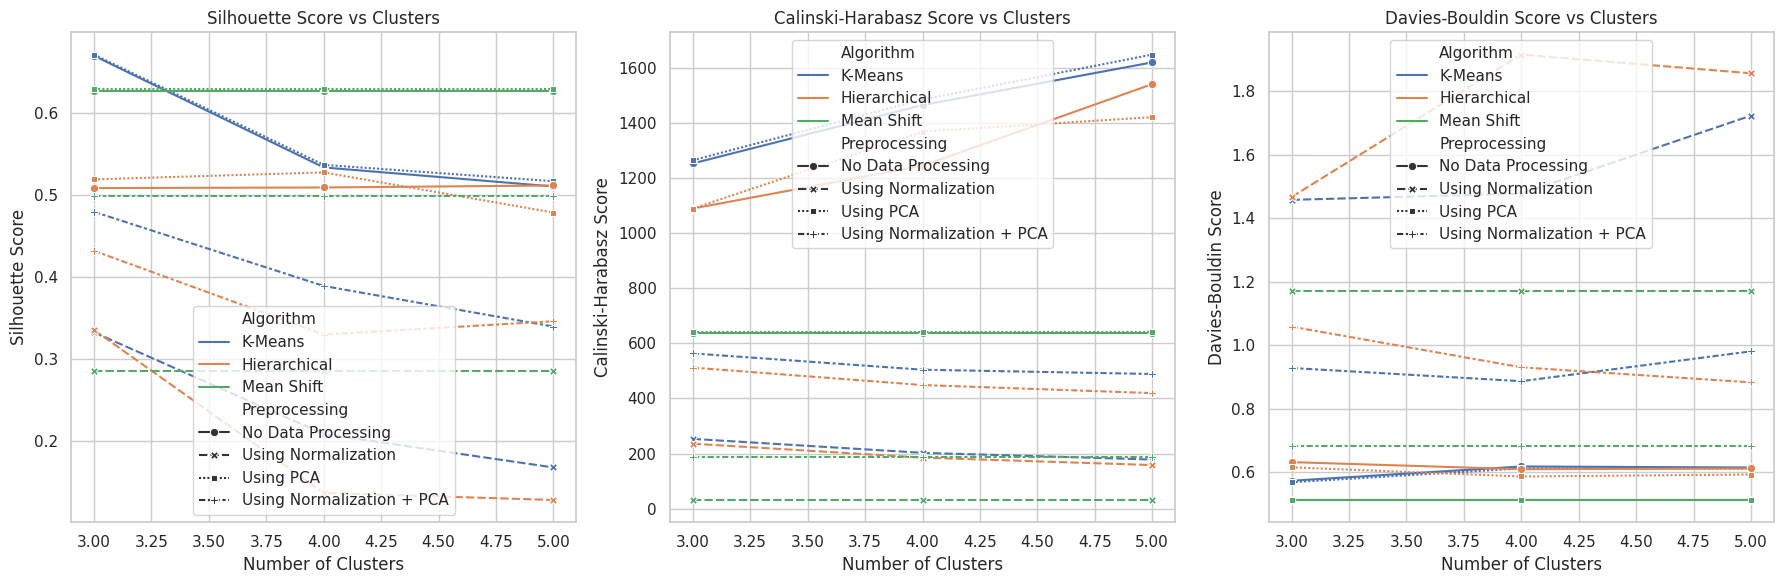

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Silhouette Score
sns.lineplot(
    x="Clusters", y="Silhouette", hue="Algorithm", style="Preprocessing",
    data=df_results, markers=True, ax=axes[0]
)
axes[0].set_title('Silhouette Score vs Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')

# Plot Calinski-Harabasz Score
sns.lineplot(
    x="Clusters", y="Calinski-Harabasz", hue="Algorithm", style="Preprocessing",
    data=df_results, markers=True, ax=axes[1]
)
axes[1].set_title('Calinski-Harabasz Score vs Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Calinski-Harabasz Score')

# Plot Davies-Bouldin Score
sns.lineplot(
    x="Clusters", y="Davies-Bouldin", hue="Algorithm", style="Preprocessing",
    data=df_results, markers=True, ax=axes[2]
)
axes[2].set_title('Davies-Bouldin Score vs Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies-Bouldin Score')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [21]:
import pandas as pd

# Load the clustering results from CSV
df = pd.read_csv("clustering_results.csv")

# Pivot the table to match the desired format
table = df.pivot_table(index=["Preprocessing", "Algorithm"],
                        columns="Clusters",
                        values=["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

# Rename multi-index columns for clarity
table.columns = [f"{metric} (Clusters={clusters})" for metric, clusters in table.columns]

# Reset index for better readability
table.reset_index(inplace=True)

# Save the formatted table to a CSV file
table.to_csv("formatted_clustering_results.csv", index=False)

# Display the tabulated results
print(table)


                Preprocessing     Algorithm  Calinski-Harabasz (Clusters=3)  \
0          No Data Processing  Hierarchical                     1089.929436   
1          No Data Processing       K-Means                     1253.864551   
2          No Data Processing    Mean Shift                      637.986610   
3         Using Normalization  Hierarchical                      235.842719   
4         Using Normalization       K-Means                      253.295210   
5         Using Normalization    Mean Shift                       31.368659   
6   Using Normalization + PCA  Hierarchical                      512.223376   
7   Using Normalization + PCA       K-Means                      563.778202   
8   Using Normalization + PCA    Mean Shift                      186.640386   
9                   Using PCA  Hierarchical                     1089.940195   
10                  Using PCA       K-Means                     1265.253745   
11                  Using PCA    Mean Shift         

In [22]:
from google.colab import files
files.download("formatted_clustering_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>